In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Data loading

In [2]:
df = pd.read_csv("studentInfo_balanced.csv")

df

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,2,3,1,4,4,10,1,0,90,0,0
1,1,1,0,0,1,8,1,0,60,0,0
2,2,3,1,9,2,3,1,1,90,0,1
3,2,3,1,3,0,2,1,0,120,0,0
4,5,0,1,5,2,4,0,0,120,0,2
...,...,...,...,...,...,...,...,...,...,...,...
63374,2,2,0,4,2,10,0,0,30,0,1
63375,5,2,0,3,1,1,1,0,60,0,1
63376,2,3,1,4,2,7,1,1,30,0,1
63377,3,2,0,11,2,0,0,0,60,0,1


# Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63379 entries, 0 to 63378
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   code_module           63379 non-null  int64
 1   code_presentation     63379 non-null  int64
 2   gender                63379 non-null  int64
 3   region                63379 non-null  int64
 4   highest_education     63379 non-null  int64
 5   imd_band              63379 non-null  int64
 6   age_band              63379 non-null  int64
 7   num_of_prev_attempts  63379 non-null  int64
 8   studied_credits       63379 non-null  int64
 9   disability            63379 non-null  int64
 10  final_result          63379 non-null  int64
dtypes: int64(11)
memory usage: 5.3 MB


In [4]:
df['final_result'].value_counts()

0    17770
1    16000
3    15058
2    14551
Name: final_result, dtype: int64

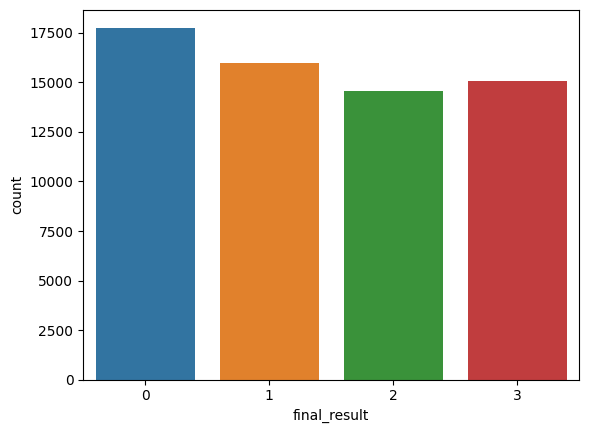

In [5]:
sns.countplot(data=df, x="final_result")
plt.show()

In [6]:
df.dtypes

code_module             int64
code_presentation       int64
gender                  int64
region                  int64
highest_education       int64
imd_band                int64
age_band                int64
num_of_prev_attempts    int64
studied_credits         int64
disability              int64
final_result            int64
dtype: object

In [7]:
df.describe()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000,63379.000000
mean,2.983039,1.790057,0.546522,5.903769,1.003156,4.556730,0.330614,0.175358,81.029205,0.102211,1.424383
std,1.698200,1.068355,0.497835,3.661517,0.987036,2.968129,0.488246,0.496970,41.445111,0.302927,1.131472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,60.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,6.000000,1.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000
75%,5.000000,3.000000,1.000000,9.000000,2.000000,7.000000,1.000000,0.000000,120.000000,0.000000,2.000000
max,6.000000,3.000000,1.000000,12.000000,4.000000,10.000000,2.000000,6.000000,655.000000,1.000000,3.000000


# Data sampling

In [8]:
labels = df['final_result']
df1 = df.drop(['final_result'], axis = 1, inplace=True)

df

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,2,3,1,4,4,10,1,0,90,0
1,1,1,0,0,1,8,1,0,60,0
2,2,3,1,9,2,3,1,1,90,0
3,2,3,1,3,0,2,1,0,120,0
4,5,0,1,5,2,4,0,0,120,0
...,...,...,...,...,...,...,...,...,...,...
63374,2,2,0,4,2,10,0,0,30,0
63375,5,2,0,3,1,1,1,0,60,0
63376,2,3,1,4,2,7,1,1,30,0
63377,3,2,0,11,2,0,0,0,60,0


In [9]:
x = pd.DataFrame(df)
y = pd.DataFrame(labels)
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(63379, 10) (63379, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

# Logistic regression

In [11]:
# Model creation
lrclf = LogisticRegression()
# Model training
lrclf.fit(X_train,y_train)
# Model predicting
y_pred_lr = lrclf.predict(X_test)
# Model evaluation
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr, average="macro")
lr_recall = recall_score(y_test, y_pred_lr, average="macro")
lr_f1 = f1_score(y_test, y_pred_lr, average="macro")

print("Logistic Regression Accuracy:", lr_acc)
print("Logistic Regression Precision:", lr_prec)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1 Score:", lr_f1)

c:\Users\Sashank Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.3736194383086147
Logistic Regression Precision: 0.3736709942575742
Logistic Regression Recall: 0.36518316326782635
Logistic Regression F1 Score: 0.3382903659221065


c:\Users\Sashank Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


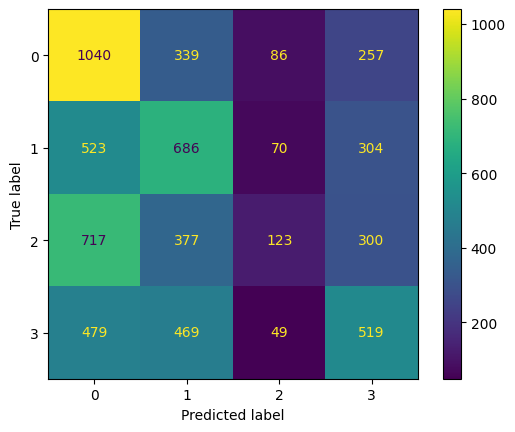

In [12]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lrclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lrclf.classes_)
disp.plot()

# Decision tree

In [13]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train,y_train)

y_pred_dt = dtclf.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt, average="macro")
dt_recall = recall_score(y_test, y_pred_dt, average="macro")
dt_f1 = f1_score(y_test, y_pred_dt, average="macro")

print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree Precision:", dt_prec)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)

Decision Tree Accuracy: 0.9187440833070369
Decision Tree Precision: 0.9182677526203
Decision Tree Recall: 0.915495489108163
Decision Tree F1 Score: 0.9152900942599766


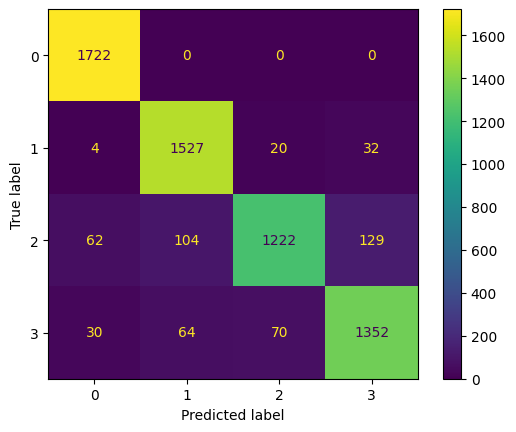

In [14]:
cm = confusion_matrix(y_test, y_pred_dt, labels=dtclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtclf.classes_)
disp.plot()

# Random forest

In [15]:
rfclf=RandomForestClassifier()
rfclf.fit(X_train,y_train)
y_pred_rf = rfclf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf, average="macro")
rf_recall = recall_score(y_test, y_pred_rf, average="macro")
rf_f1 = f1_score(y_test, y_pred_rf, average="macro")

print("Random Forest Accuracy:", rf_acc)
print("Random Forest Precision:", rf_prec)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

C:\Users\Sashank Sharma\AppData\Local\Temp\ipykernel_8408\1742632725.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf.fit(X_train,y_train)


Random Forest Accuracy: 0.918428526349006
Random Forest Precision: 0.9183871407895923
Random Forest Recall: 0.9151177944944546
Random Forest F1 Score: 0.9148755437096718


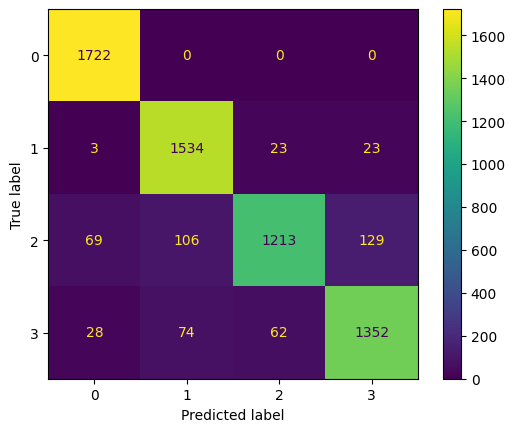

In [16]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rfclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfclf.classes_)
disp.plot()

# Looking at feature importance

In [17]:
for name,imp in zip(rfclf.feature_names_in_, rfclf.feature_importances_):
    print(name, "-->" , imp)

code_module --> 0.11338355209279827
code_presentation --> 0.08501103343909949
gender --> 0.038309903369069885
region --> 0.3215178351768928
highest_education --> 0.05761570519082833
imd_band --> 0.20720940823096867
age_band --> 0.04247923780845709
num_of_prev_attempts --> 0.02357950400369728
studied_credits --> 0.08530568262957562
disability --> 0.02558813805861266


# Model comparision

[0.3736194383086147, 0.9187440833070369, 0.918428526349006]


Text(0.5, 1.0, 'Accuracy score Comparison (Higher is better)')

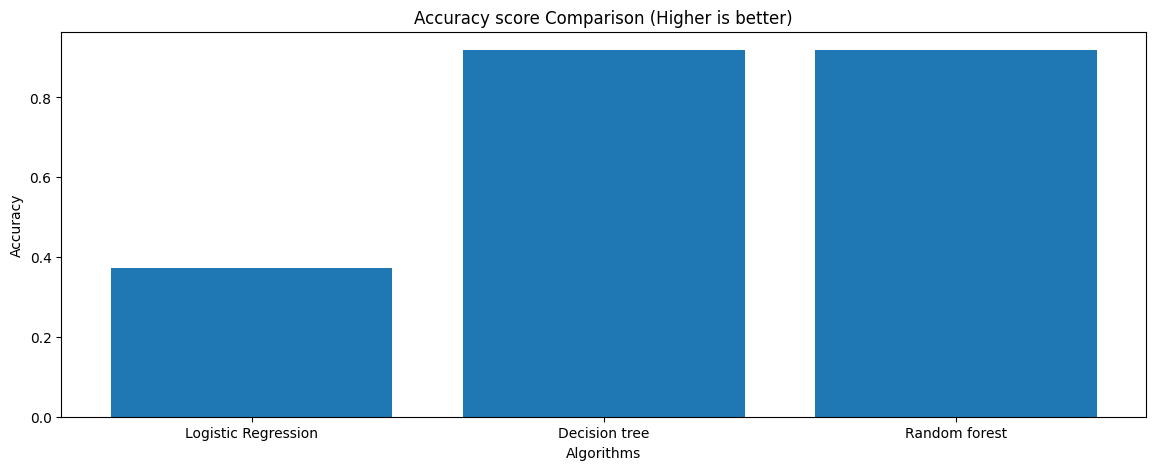

In [18]:
algorithms = ['Logistic Regression','Decision tree','Random forest']
acc = [lr_acc,dt_acc,rf_acc]
print(acc)

plt.figure(figsize=[14,5])
plt.bar(algorithms, acc)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy score Comparison (Higher is better)")